# **1. Import Library**

In [68]:
#Import libraries yang akan digunakan
#Import libraries yang akan digunakan
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# **2. Read Dataset**

In [69]:
# Memuat dataset 'breast_cancer' dari scikit-learn dan mengonversinya menjadi DataFrame
housing = fetch_california_housing()

# Memisahkan dataset menjadi fitur (X) sebagai data input dan target (y) sebagai label output untuk model machine learning
X = housing.data
y = housing.target

# Mengonversi menjadi DataFrame
df_X = pd.DataFrame(X, columns=housing.feature_names)
df_y = pd.Series(y, name='target')

# Menggabungkan fitur dan target menjadi satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

# Menampilkan data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [70]:
df ['target'].value_counts()

,count
target,
5.00001,965
1.37500,122
1.62500,117
1.12500,103
1.87500,93
...,...
3.59200,1
0.54900,1
3.77600,1


array([[<Axes: title={'center': 'HouseAge'}>]], dtype=object)

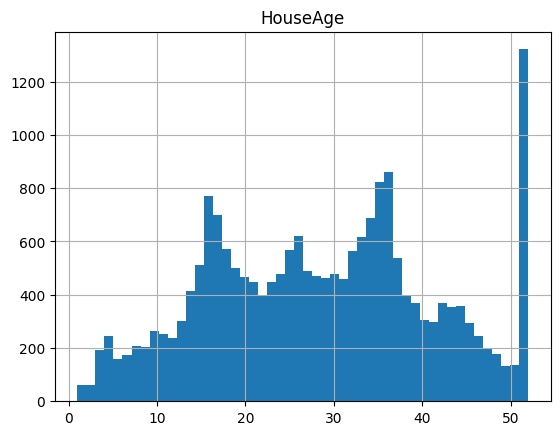

In [34]:
df.hist(column='HouseAge', bins=50)

In [72]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [74]:
X = df[['HouseAge', 'Population']].values
Y = df['target'].values

# **3. Standarisasi**

In [75]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# **4. Split Data menjadi Training dan Testing**

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print('Data Training sebanyak : ', X_train.shape)
print('Data Testing sebanyak : ', X_test.shape, Y_test.shape)

Data Training sebanyak :  (16512, 2)
Data Testing sebanyak :  (4128, 2) (4128,)


In [77]:
Y_train_class = np.round(Y_train).astype(int)
Y_test_class = np.round(Y_test).astype(int)

# **5. Klasifikasi menggunakan KNN**

In [78]:
k = 5
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train_class)
yhat = neigh.predict(X_test)

print("Akurasi set Train: ", metrics.accuracy_score(Y_train_class, neigh.predict(X_train)))
print("Akurasi set Test: ", metrics.accuracy_score(Y_test_class, yhat))

Akurasi set Train:  0.5360949612403101
Akurasi set Test:  0.35319767441860467


# **6. Mencari nilai K terbaik**

In [79]:
Ks = 20
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train_class)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(Y_test_class, yhat)
    std_acc[n - 1] = np.std(yhat == Y_test_class) / np.sqrt(yhat.shape[0])


# **7. Plot Hasil Akurasi**

Mean Accuracy:  [0.28318798 0.34399225 0.34665698 0.33866279 0.35319767 0.34932171
 0.34520349 0.35416667 0.35755814 0.35828488 0.35852713 0.36046512
 0.3624031  0.36700581 0.36749031 0.36797481 0.36337209 0.36385659
 0.36700581]


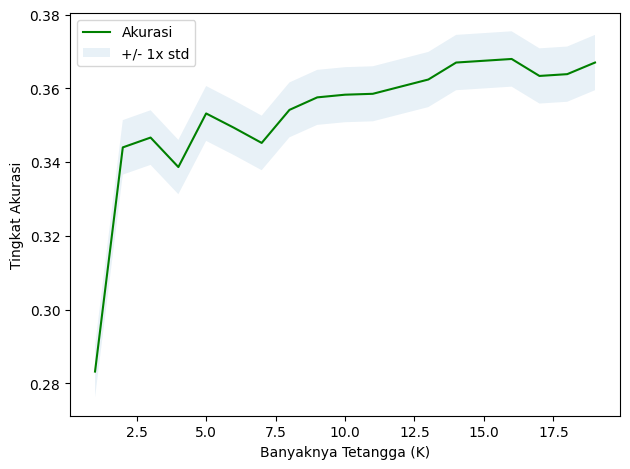

In [80]:
print("Mean Accuracy: ", mean_acc)
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(["Akurasi", "+/- 1x std"])
plt.ylabel("Tingkat Akurasi")
plt.xlabel("Banyaknya Tetangga (K)")
plt.tight_layout()
plt.show()

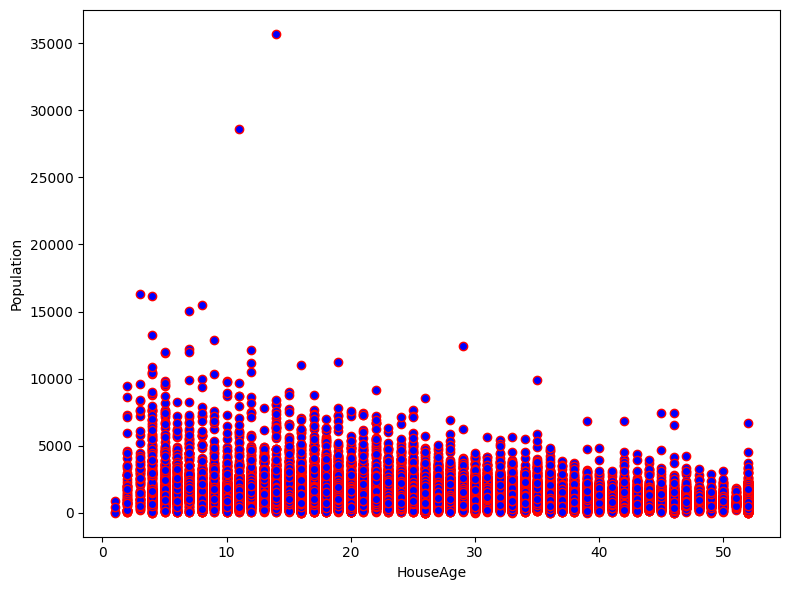

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(df['HouseAge'], df['Population'], c='blue', marker='o', edgecolors='red')
plt.xlabel('HouseAge')
plt.ylabel('Population')
plt.tight_layout()
plt.show()